# Pymaceuticals Inc.
---

### Analysis

- Capomulin was tested against 8 other tumor treatment regimens as well as a placebo group. The tumor volume of mice that were tested with Capomulin seemed significantly lower than 7 of the other treatments, and the placebo. The only other drug that closely compared to Capumulin in reducing tumor size was Ramicane. These results may have been impacted by the number of mice treated with both Capomulin and Ramicane, as those two drugs were used to test 230 and 228 mice, respectively, where as the other treatments were used on between 148 and 188 mice. More testing will need to occur with a larger population of mice in order to confirm the results, but at this time treatment using Capomulin appears promising.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
combined_df.shape

(1893, 8)

In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = combined_df.loc[combined_df["Mouse ID"] == "g989"]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
#clean_df
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
clean_df.groupby(['Drug Regimen'])["Mouse ID"].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [11]:
counts = clean_df['Drug Regimen'].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

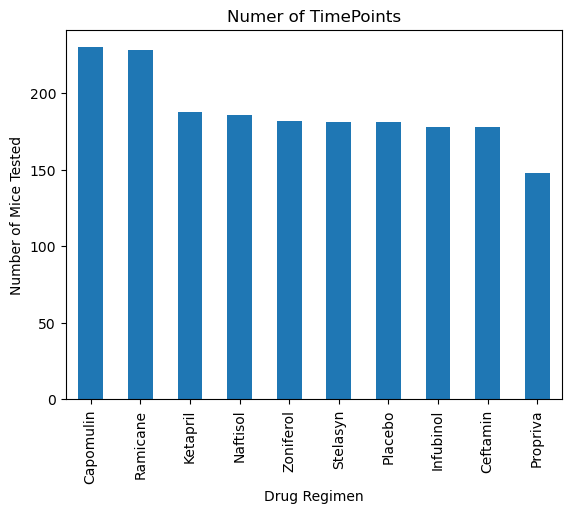

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.title("Numer of TimePoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

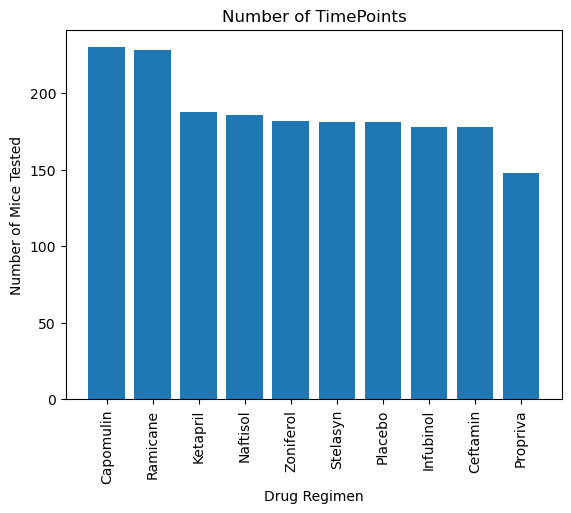

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Number of TimePoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

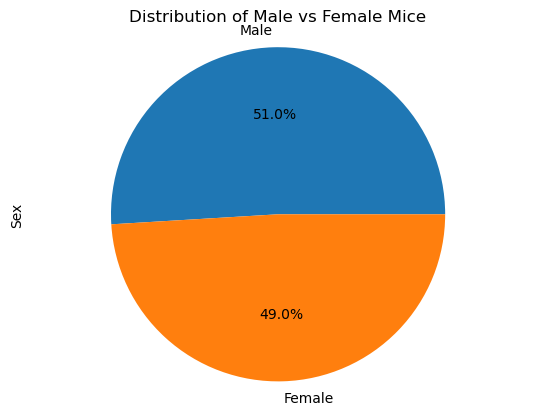

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_df['Sex'].value_counts()
counts.plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Male vs Female Mice")
plt.axis('equal')
plt.show()

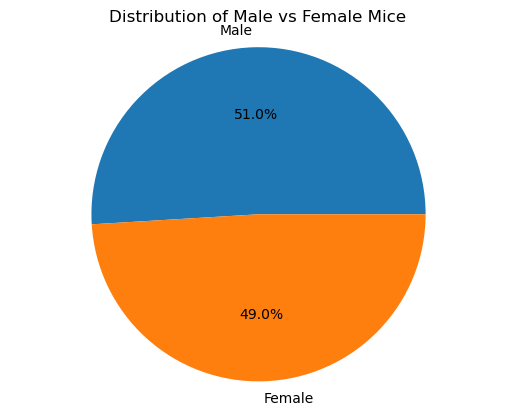

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_df['Sex'].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of Male vs Female Mice")
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(regimen_list)]

# Start by getting the last (greatest) timepoint for each mouse
grouped_df = filtered_df.groupby('Mouse ID')
max_timepoints = grouped_df['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(filtered_df, max_timepoints, on=['Mouse ID', 'Timepoint'])
final_tumor_volumes = final_tumor_volume_df['Tumor Volume (mm3)']
final_tumor_volumes

0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     36.321346
        ...    
95    32.978522
96    33.562402
97    41.581521
98    31.023923
99    61.433892
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [17]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = final_tumor_volume_df['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers.tolist()}")

Ceftamin's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ramicane's potential outliers: []
Capomulin's potential outliers: []


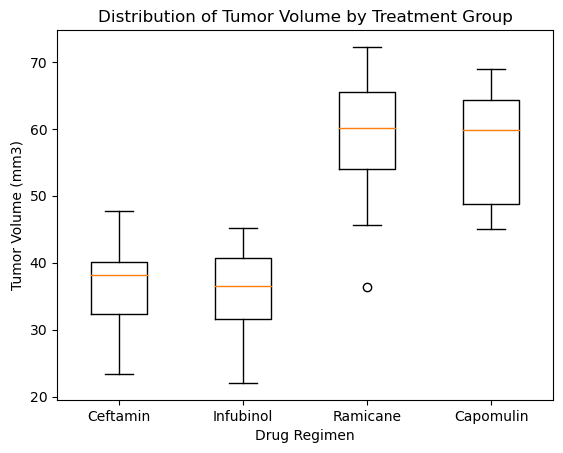

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a list of tumor volumes for each treatment group
tumor_vol_data = [
    final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'],
    final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'],
    final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'],
    final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(tumor_vol_data, labels=treatments)

# Set labels and title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Distribution of Tumor Volume by Treatment Group")

# Display the plot
plt.show()



## Line and Scatter Plots

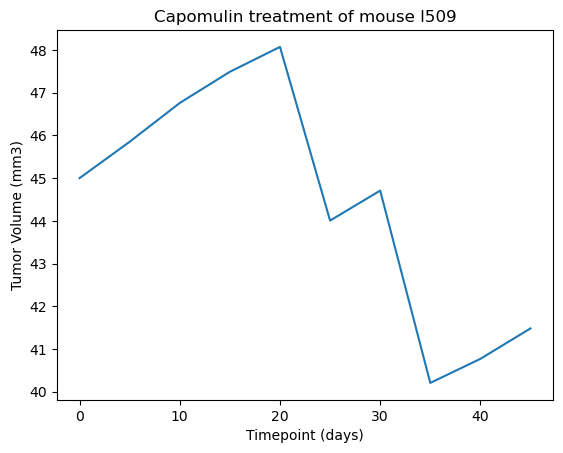

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

#Select a specific mouse
mouse = 'l509'  
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse}')

# Display the plot
plt.show()

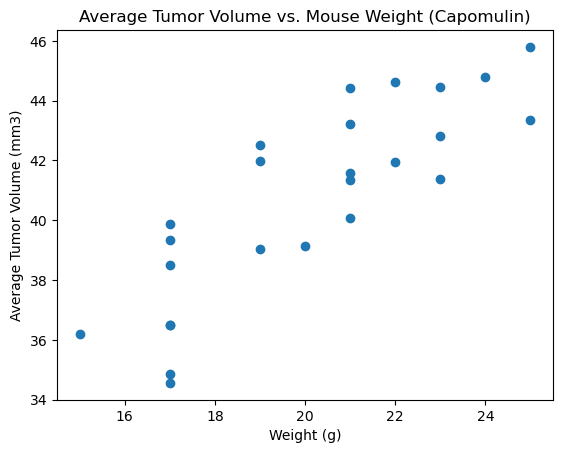

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

grouped_df = capomulin_df.groupby('Mouse ID').mean()
average_tumor_volume = grouped_df['Tumor Volume (mm3)']
mouse_weight = grouped_df['Weight (g)']

plt.scatter(mouse_weight, average_tumor_volume)

# Set labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')

# Display the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694718


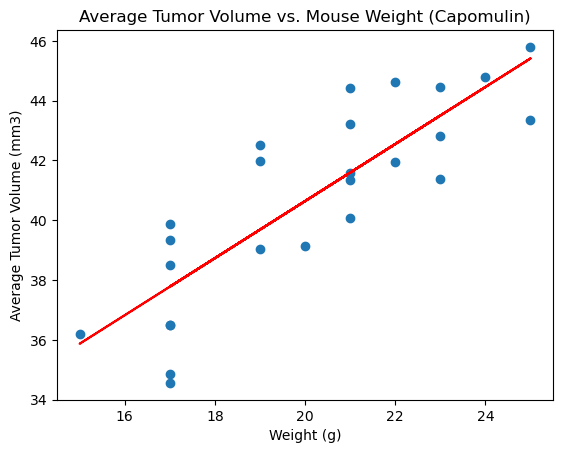

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

grouped_df = capomulin_df.groupby('Mouse ID').mean()
average_tumor_volume = grouped_df['Tumor Volume (mm3)']
mouse_weight = grouped_df['Weight (g)']

plt.scatter(mouse_weight, average_tumor_volume)

correlation = st.pearsonr(mouse_weight, average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]}")

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight, regress_values, color='red')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin)')

plt.show()